In [194]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("mps")
torch.set_default_device(device)

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True,
                                transform=transforms.Compose([transforms.ToTensor()]))
features = mnist_trainset.data.float().to(device)
labels = mnist_trainset.targets.to(device)

train_size = int(features.shape[0] * 0.9)
train_feat = features[:train_size,:]
train_labels = labels[:train_size:]
test_feat = features[train_size:,:]
test_labels = labels[train_size:]



In [195]:
class MnistAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        hdim = 128
        zdim = 8
        self.ed1 = nn.Linear(d, hdim)
        self.ed2 = nn.Linear(hdim, hdim)
        self.ed3 = nn.Linear(hdim, zdim)

        self.dd1 = nn.Linear(zdim, hdim)
        self.dd2 = nn.Linear(hdim, hdim)
        self.dd3 = nn.Linear(hdim, d)

    def forward(self, x):
        d = torch.flatten(x, 1)

        # encoder
        d = self.ed1(d)
        d = F.leaky_relu(d)
        d = self.ed2(d)
        d = F.leaky_relu(d)
        d = self.ed3(d)

        # decoder
        d = self.dd1(d)
        d = F.leaky_relu(d)
        d = self.dd2(d)
        d = F.leaky_relu(d)
        d = self.dd3(d)
        d = F.leaky_relu(d)

        return d.view(-1, 28, 28)
# loss (epoch 166): 1247.7587890625


class MnistConvAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        zdim = 64
        self.channels = channels = 16
        self.conv1 = torch.nn.Conv2d(1, channels, 5, padding="same")
        self.conv2 = torch.nn.Conv2d(channels, channels, 5, padding="same")
        self.ed1 = torch.nn.Linear(7 * 7 * channels, zdim)
        self.dd1 = torch.nn.Linear(zdim, 7 * 7 * channels)
        self.deconv1 = torch.nn.ConvTranspose2d(channels, channels, 4, 2, padding=1)
        self.deconv2 = torch.nn.ConvTranspose2d(channels, 1, 4, 2, padding=1)

    def forward(self, x):
        # encoder
        d = x.unsqueeze(1)
        d = self.conv1(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = self.conv2(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = torch.flatten(d, 1)
        d = self.ed1(d)


        # decoder
        d = self.dd1(d)
#        print(f"decdense shape", d.shape)
        d = d.view(-1, self.channels, 7, 7)
 #       print(f"preconvtransshape {d.shape}")
        d = self.deconv1(d)
  #      print(f"postconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        d = self.deconv2(d)
#        print(f"postpostconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        return d.squeeze(1)

# loss 770 after 20 epochs

# loss (epoch 10): 241.1332244873047
# channels 16
# zdim 128
# batch size 64

# channels 8
# zdim 128
# batch size 64
# loss (epoch 10): 337.88165283203125
# looks good though

# channels 16
# zdim 64
# batch size 64
# loss (epoch 10): 265.50518798828125

class MnistAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        hdim = 128
        zdim = 8
        self.ed1 = nn.Linear(d, hdim)
        self.ed2 = nn.Linear(hdim, hdim)
        self.ed3 = nn.Linear(hdim, zdim)

        self.dd1 = nn.Linear(zdim, hdim)
        self.dd2 = nn.Linear(hdim, hdim)
        self.dd3 = nn.Linear(hdim, d)

    def forward(self, x):
        d = torch.flatten(x, 1)

        # encoder
        d = self.ed1(d)
        d = F.leaky_relu(d)
        d = self.ed2(d)
        d = F.leaky_relu(d)
        d = self.ed3(d)

        # decoder
        d = self.dd1(d)
        d = F.leaky_relu(d)
        d = self.dd2(d)
        d = F.leaky_relu(d)
        d = self.dd3(d)
        d = F.leaky_relu(d)

        return d.view(-1, 28, 28)
# loss (epoch 166): 1247.7587890625


class MnistConvAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        zdim = 64
        self.channels = channels = 16
        self.conv1 = torch.nn.Conv2d(1, channels, 5, padding="same")
        self.conv2 = torch.nn.Conv2d(channels, channels, 5, padding="same")
        self.ed1 = torch.nn.Linear(7 * 7 * channels, zdim)
        self.dd1 = torch.nn.Linear(zdim, 7 * 7 * channels)
        self.deconv1 = torch.nn.ConvTranspose2d(channels, channels, 4, 2, padding=1)
        self.deconv2 = torch.nn.ConvTranspose2d(channels, 1, 4, 2, padding=1)

    def forward(self, x):
        # encoder
        d = x.unsqueeze(1)
        d = self.conv1(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = self.conv2(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = torch.flatten(d, 1)
        d = self.ed1(d)


        # decoder
        d = self.dd1(d)
#        print(f"decdense shape", d.shape)
        d = d.view(-1, self.channels, 7, 7)
 #       print(f"preconvtransshape {d.shape}")
        d = self.deconv1(d)
  #      print(f"postconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        d = self.deconv2(d)
#        print(f"postpostconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        return d.squeeze(1)

# loss 770 after 20 epochs

# loss (epoch 10): 241.1332244873047
# channels 16
# zdim 128
# batch size 64

# channels 8
# zdim 128
# batch size 64
# loss (epoch 10): 337.88165283203125
# looks good though

# channels 16
# zdim 64
# batch size 64
# loss (epoch 10): 265.50518798828125
class MnistAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        hdim = 128
        zdim = 8
        self.ed1 = nn.Linear(d, hdim)
        self.ed2 = nn.Linear(hdim, hdim)
        self.ed3 = nn.Linear(hdim, zdim)

        self.dd1 = nn.Linear(zdim, hdim)
        self.dd2 = nn.Linear(hdim, hdim)
        self.dd3 = nn.Linear(hdim, d)

    def forward(self, x):
        d = torch.flatten(x, 1)

        # encoder
        d = self.ed1(d)
        d = F.leaky_relu(d)
        d = self.ed2(d)
        d = F.leaky_relu(d)
        d = self.ed3(d)

        # decoder
        d = self.dd1(d)
        d = F.leaky_relu(d)
        d = self.dd2(d)
        d = F.leaky_relu(d)
        d = self.dd3(d)
        d = F.leaky_relu(d)

        return d.view(-1, 28, 28)
# loss (epoch 166): 1247.7587890625


class MnistConvAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        zdim = 64
        self.channels = channels = 16
        self.conv1 = torch.nn.Conv2d(1, channels, 5, padding="same")
        self.conv2 = torch.nn.Conv2d(channels, channels, 5, padding="same")
        self.ed1 = torch.nn.Linear(7 * 7 * channels, zdim)
        self.dd1 = torch.nn.Linear(zdim, 7 * 7 * channels)
        self.deconv1 = torch.nn.ConvTranspose2d(channels, channels, 4, 2, padding=1)
        self.deconv2 = torch.nn.ConvTranspose2d(channels, 1, 4, 2, padding=1)

    def forward(self, x):
        # encoder
        d = x.unsqueeze(1)
        d = self.conv1(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = self.conv2(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = torch.flatten(d, 1)
        d = self.ed1(d)


        # decoder
        d = self.dd1(d)
#        print(f"decdense shape", d.shape)
        d = d.view(-1, self.channels, 7, 7)
 #       print(f"preconvtransshape {d.shape}")
        d = self.deconv1(d)
  #      print(f"postconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        d = self.deconv2(d)
#        print(f"postpostconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        return d.squeeze(1)

# loss 770 after 20 epochs

# loss (epoch 10): 241.1332244873047
# channels 16
# zdim 128
# batch size 64

# channels 8
# zdim 128
# batch size 64
# loss (epoch 10): 337.88165283203125
# looks good though

# channels 16
# zdim 64
# batch size 64
# loss (epoch 10): 265.50518798828125
class MnistAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        hdim = 128
        zdim = 8
        self.ed1 = nn.Linear(d, hdim)
        self.ed2 = nn.Linear(hdim, hdim)
        self.ed3 = nn.Linear(hdim, zdim)

        self.dd1 = nn.Linear(zdim, hdim)
        self.dd2 = nn.Linear(hdim, hdim)
        self.dd3 = nn.Linear(hdim, d)

    def forward(self, x):
        d = torch.flatten(x, 1)

        # encoder
        d = self.ed1(d)
        d = F.leaky_relu(d)
        d = self.ed2(d)
        d = F.leaky_relu(d)
        d = self.ed3(d)

        # decoder
        d = self.dd1(d)
        d = F.leaky_relu(d)
        d = self.dd2(d)
        d = F.leaky_relu(d)
        d = self.dd3(d)
        d = F.leaky_relu(d)

        return d.view(-1, 28, 28)
# loss (epoch 166): 1247.7587890625


class MnistConvAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        zdim = 64
        self.channels = channels = 16
        self.conv1 = torch.nn.Conv2d(1, channels, 5, padding="same")
        self.conv2 = torch.nn.Conv2d(channels, channels, 5, padding="same")
        self.ed1 = torch.nn.Linear(7 * 7 * channels, zdim)
        self.dd1 = torch.nn.Linear(zdim, 7 * 7 * channels)
        self.deconv1 = torch.nn.ConvTranspose2d(channels, channels, 4, 2, padding=1)
        self.deconv2 = torch.nn.ConvTranspose2d(channels, 1, 4, 2, padding=1)

    def forward(self, x):
        # encoder
        d = x.unsqueeze(1)
        d = self.conv1(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = self.conv2(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = torch.flatten(d, 1)
        d = self.ed1(d)


        # decoder
        d = self.dd1(d)
#        print(f"decdense shape", d.shape)
        d = d.view(-1, self.channels, 7, 7)
 #       print(f"preconvtransshape {d.shape}")
        d = self.deconv1(d)
  #      print(f"postconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        d = self.deconv2(d)
#        print(f"postpostconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        return d.squeeze(1)

# loss 770 after 20 epochs

# loss (epoch 10): 241.1332244873047
# channels 16
# zdim 128
# batch size 64

# channels 8
# zdim 128
# batch size 64
# loss (epoch 10): 337.88165283203125
# looks good though

# channels 16
# zdim 64
# batch size 64
# loss (epoch 10): 265.50518798828125
class MnistAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        hdim = 128
        zdim = 8
        self.ed1 = nn.Linear(d, hdim)
        self.ed2 = nn.Linear(hdim, hdim)
        self.ed3 = nn.Linear(hdim, zdim)

        self.dd1 = nn.Linear(zdim, hdim)
        self.dd2 = nn.Linear(hdim, hdim)
        self.dd3 = nn.Linear(hdim, d)

    def forward(self, x):
        d = torch.flatten(x, 1)

        # encoder
        d = self.ed1(d)
        d = F.leaky_relu(d)
        d = self.ed2(d)
        d = F.leaky_relu(d)
        d = self.ed3(d)

        # decoder
        d = self.dd1(d)
        d = F.leaky_relu(d)
        d = self.dd2(d)
        d = F.leaky_relu(d)
        d = self.dd3(d)
        d = F.leaky_relu(d)

        return d.view(-1, 28, 28)
# loss (epoch 166): 1247.7587890625


class MnistConvAe(nn.Module):
    def __init__(self):
        super().__init__()
        d = 28 * 28
        zdim = 32
        self.channels = channels = 64
        self.conv1 = torch.nn.Conv2d(1, channels // 2, 5, padding="same")
        self.conv2 = torch.nn.Conv2d(channels // 2, channels, 5, padding="same")
        self.ed1 = torch.nn.Linear(7 * 7 * channels, zdim)
        self.dd1 = torch.nn.Linear(zdim, 7 * 7 * channels)
        self.deconv1 = torch.nn.ConvTranspose2d(channels, channels, 4, 2, padding=1)
        self.deconv2 = torch.nn.ConvTranspose2d(channels, 1, 4, 2, padding=1)

    def forward(self, x):
        # encoder
        d = x.unsqueeze(1)
        d = self.conv1(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = self.conv2(d)
        d = F.leaky_relu(d)
        d = F.max_pool2d(d, 2)
        d = torch.flatten(d, 1)
        d = F.dropout(d, 0.2)
        d = self.ed1(d)


        # decoder
        d = self.dd1(d)
#        print(f"decdense shape", d.shape)
        d = d.view(-1, self.channels, 7, 7)
 #       print(f"preconvtransshape {d.shape}")
        d = self.deconv1(d)
  #      print(f"postconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        d = self.deconv2(d)
#        print(f"postpostconvtransshape {d.shape}")
        d = F.leaky_relu(d)
        return d.squeeze(1)

# loss 770 after 20 epochs

# loss (epoch 10): 241.1332244873047
# channels 16
# zdim 128
# batch size 64

# channels 8
# zdim 128
# batch size 64
# loss (epoch 10): 337.88165283203125
# looks good though

# channels 16
# zdim 64
# batch size 64
# loss (epoch 10): 265.50518798828125


# channels 8
# zdim 64
# batch size 64
# loss (epoch 10): 392.00555419921875

# channels 8
# zdim 32
# batch size 64
# loss (epoch 10): 543.274658203125

# channels 32
# zdim 32
# batch size 64
# loss (epoch 10): 355.0902404785156

# channels 32
# zdim 32
# batch size 64
# 20% dropout before encoder dense layer
#loss (epoch 10): 451.0797119140625

# channels 32
# zdim 32
# batch size 64
# 20% dropout before encoder dense layer but this time set eval and train modes correctly :)
# loss (epoch 10): 448.534912109375
# tried 10x learning rate but got unstable after epoch 6

# with batch size 128 loss (epoch 10): 484.9309387207031


training set size: 54000
eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 0): 7112.93359375


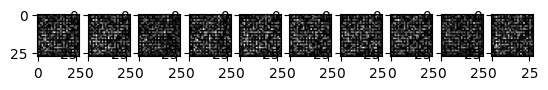

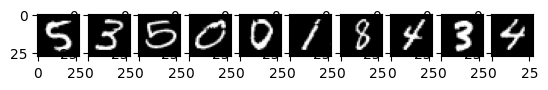

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 1): 665.9404296875


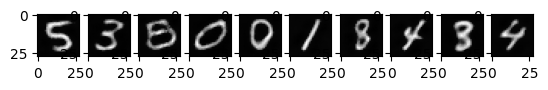

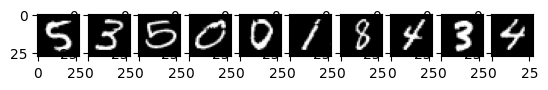

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 2): 517.1826171875


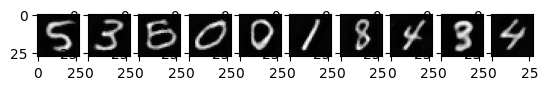

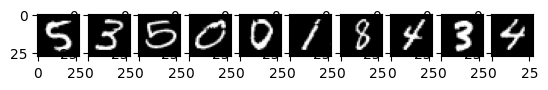

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 3): 464.81280517578125


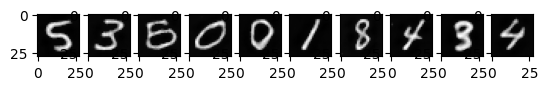

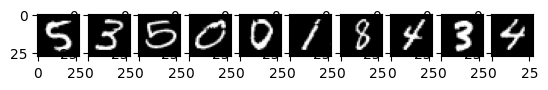

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 4): 432.7619323730469


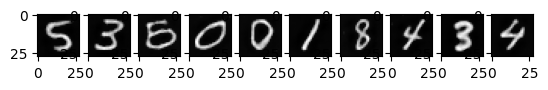

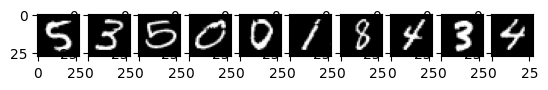

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 5): 414.269775390625


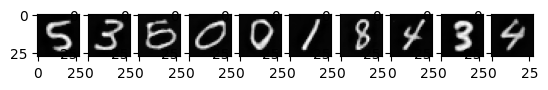

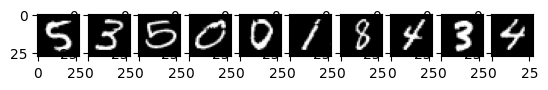

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 6): 398.329833984375


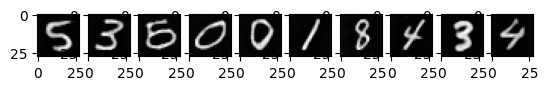

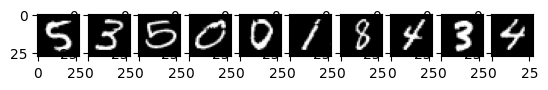

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 7): 388.6675109863281


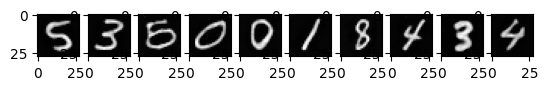

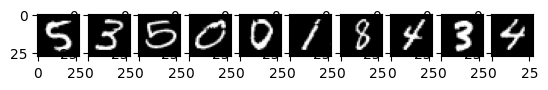

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 8): 380.42144775390625


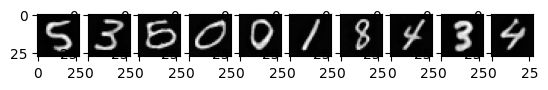

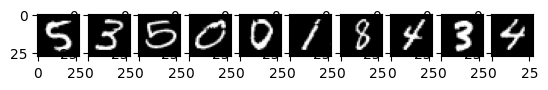

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 9): 371.344970703125


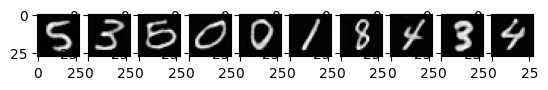

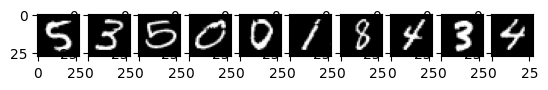

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 10): 369.9873352050781


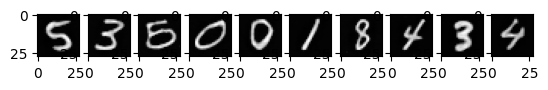

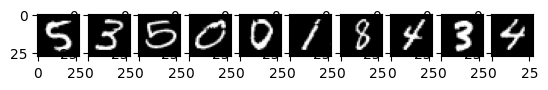

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 11): 362.6571960449219


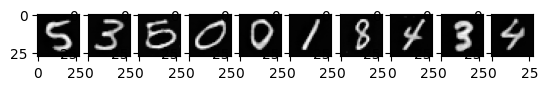

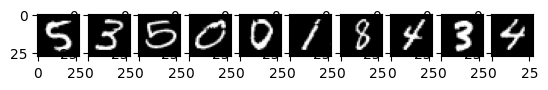

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 12): 360.0089416503906


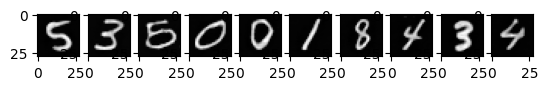

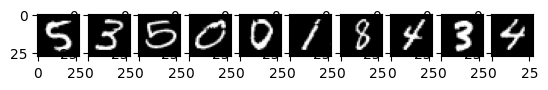

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 13): 353.6272277832031


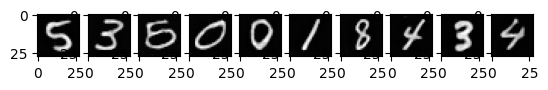

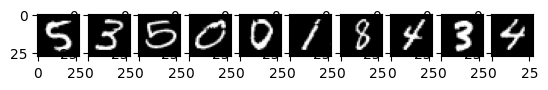

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 14): 351.80279541015625


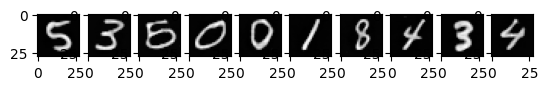

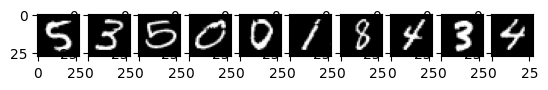

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 15): 350.6448974609375


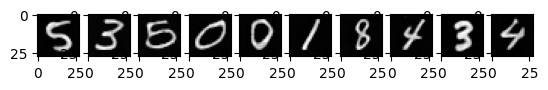

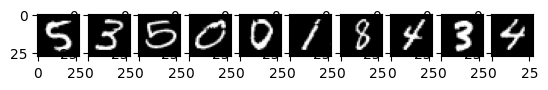

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 16): 347.55169677734375


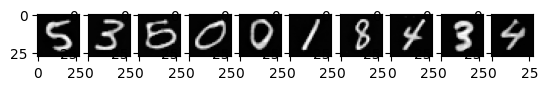

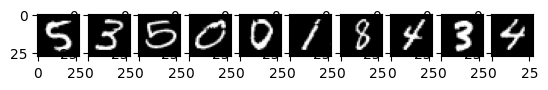

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 17): 345.9835205078125


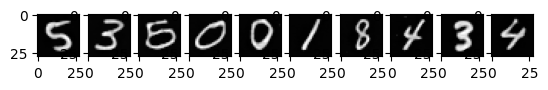

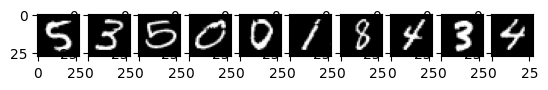

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 18): 341.9856262207031


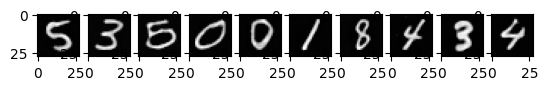

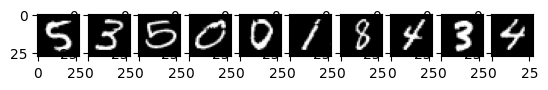

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 19): 343.6405029296875


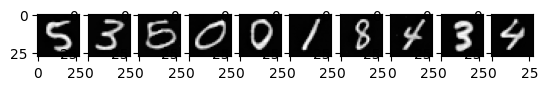

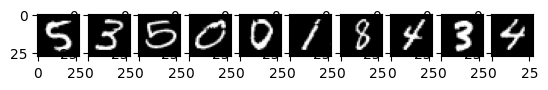

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 20): 338.15008544921875


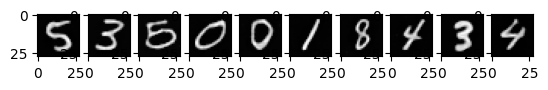

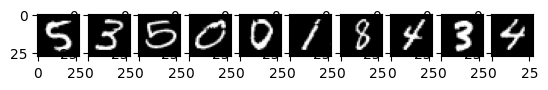

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 21): 336.8207092285156


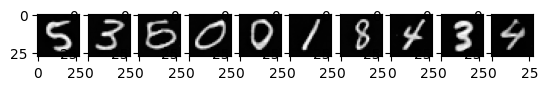

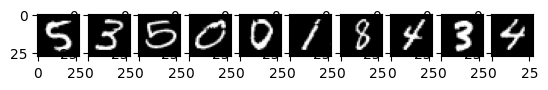

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 22): 335.8523254394531


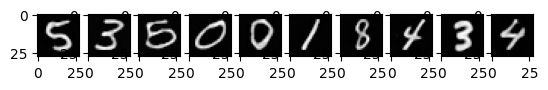

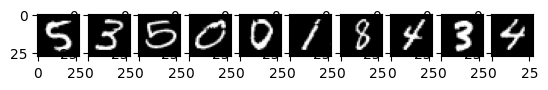

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 23): 333.6919250488281


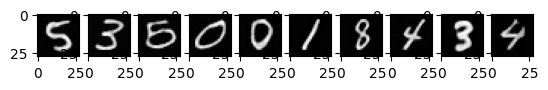

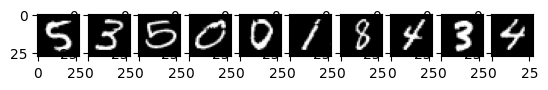

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 24): 333.4811706542969


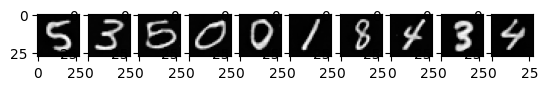

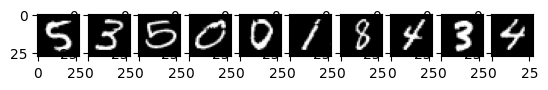

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 25): 330.5002746582031


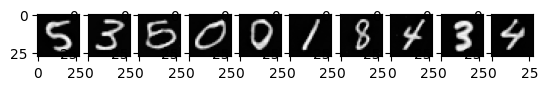

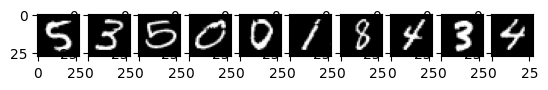

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 26): 332.44012451171875


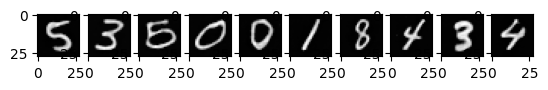

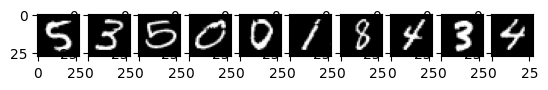

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 27): 330.6084899902344


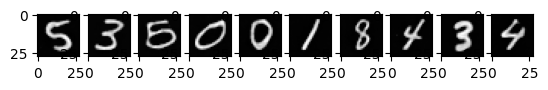

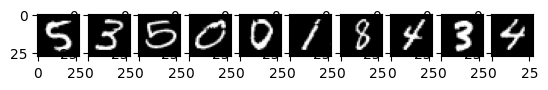

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 28): 330.96966552734375


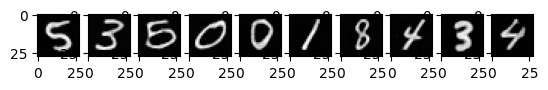

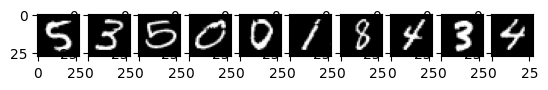

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 29): 328.6473388671875


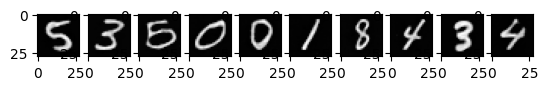

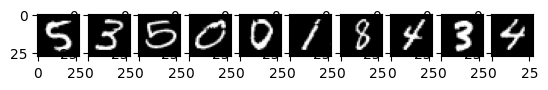

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 30): 329.3971252441406


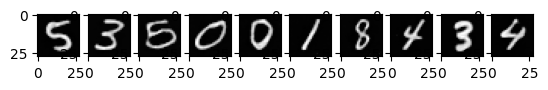

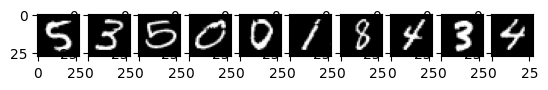

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 31): 327.0184020996094


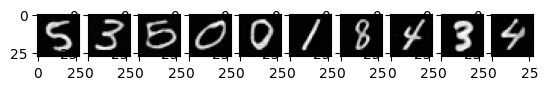

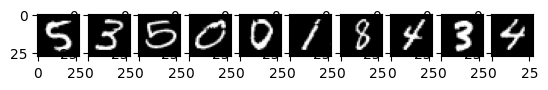

eval shape torch.Size([6000, 28, 28])
feat shape torch.Size([6000, 28, 28])
loss (epoch 32): 327.01312255859375


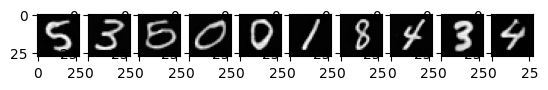

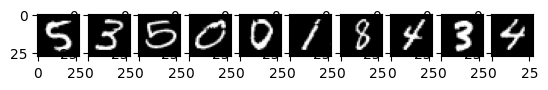

KeyboardInterrupt: 

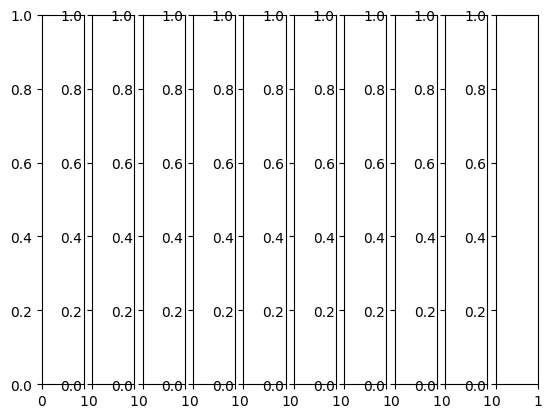

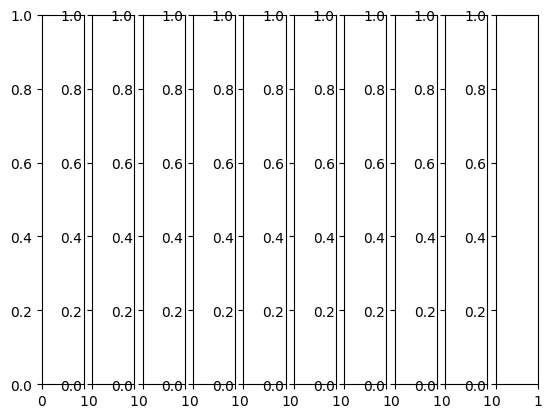

: 

In [196]:
learning_rate = 3e-4
classifier = MnistConvAe()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)
batch_size = 64
print(f"training set size: {train_feat.shape[0]}")

for epoch in range(500):
    if epoch % 1 == 0:
        test_outputs = classifier(test_feat)
        f, axrr = plt.subplots(1, 10)
        f, axrr2 = plt.subplots(1, 10)
        classifier.eval()
        for i in range(10):
            axrr[i].imshow(test_outputs[i].detach().cpu().numpy(), cmap='gray')
            axrr2[i].imshow(test_feat[i].detach().cpu().numpy(), cmap='gray')

        print("eval shape", test_outputs.shape)
        print("feat shape", test_feat.shape)
        
        test_loss = F.mse_loss(test_outputs, test_feat)
        print(f'loss (epoch {epoch}): {test_loss.item()}')
        plt.show()

    classifier.train()
    for i in range((train_feat.shape[0] // batch_size)):
        optimizer.zero_grad()
        batch_samples = train_feat[i * batch_size:(i + 1) * batch_size, :]

        outputs = classifier(batch_samples)

        loss = F.mse_loss(batch_samples, outputs)
        loss.backward()
        optimizer.step()


    # plt.imshow(classifier(train_feat[0]).detach().cpu().numpy(), cmap='gray')
    # plt.show()



